(supervised:general:quality-measures)=
# Quality Measures

To evaluate and sometimes also to train a machine learning model we have to express approximation quality on given set of samples numerically. Choosing a suitable quality measure heavily depends on the underlying task. A standard measures for regression problems is the mean of the squared Euclidean distances between correct and predicted output, in this context usually referred to as *mean squared error*. For classification tasks the *correct classification rate* (sometimes denoted as *accurcy*) is a straight-foward quality measure.

## Quality Measures for Regression Problems

For regression tasks all quality measures have the form
\begin{equation*}
\frac{1}{n}\,\sum_{l=1}^nl\bigl(f_{\mathrm{approx}}(x_l),y_l\bigr),
\end{equation*}
where $(x_1,y_1),\ldots,(x_n,y_n)$ are the samples (inputs and correct labels) on which to compute $f_{\mathrm{approx}}$'s predition quality and $l:\mathbb{R}\rightarrow\mathbb{R}$ is some (usually nonnegative) function. Quality measures of this form often are denoted as *loss functions*.

### Mean Squared Error

Mean squared error (MSE) is the Euclidean distance between the vectors of correct and predicted outputs:
\begin{equation*}
\frac{1}{n}\,\sum_{l=1}^n\bigl(f_{\mathrm{approx}}(x_l)-y_l\bigr)^2.
\end{equation*}

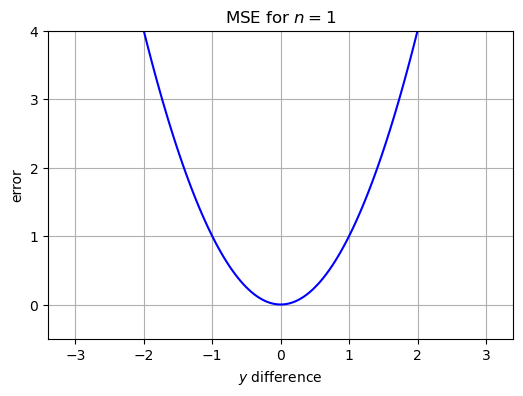

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))

y_diff = np.linspace(-2, 2, 100)
error = y_diff ** 2
ax.plot(y_diff, error, '-b')
ax.axis('equal')
ax.grid()
ax.set_ylim(-0.5, 4)
ax.set_yticks([0, 1, 2, 3, 4])
ax.set_xlabel('$y$ difference')
ax.set_ylabel('error')
ax.set_title('MSE for $n=1$')

plt.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.layout.width = 800
fig.layout.height = 600

y1_diff, y2_diff = np.meshgrid(y_diff, y_diff)
error = 0.5 * (y1_diff ** 2 + y2_diff ** 2)
fig.add_trace(go.Surface(
    x=y1_diff, y=y2_diff, z=error,
    colorscale=[[0, 'rgb(0,0,255)'], [1, 'rgb(0,0,255)']],
    showscale=False
))

fig.update_scenes(
    xaxis_title_text='y<sub>1</sub> difference',  
    yaxis_title_text='y<sub>2</sub> difference',  
    zaxis_title_text='error'
)
fig.update_layout(scene_aspectmode='cube', title={'text': 'MSE for n = 2', 'x': 0.5, 'xanchor': 'center'})

fig.show()

Use of this loss function is motivated by three major advantages:
* It is differentiable and, thus, accessible to efficient optimization algorithms.
* Solutions to corresponding minimization problems in many cases can be made explicit.
* One can prove mathematically that mean squared error is the (in some sense) optimal loss function if labels follow a Gaussian distribution. Details will be addressed in statistics lectures (*maximum aposteriory probability estimation* or *MAP estimation* for short).

A drawback is its sensitivity to outliers. Due to its quadratic nature, small deviations between predicted and correct labels result in very small changes of the loss function only. In contrast, large deviations (outliers!) result in extremely large values of the corresponding summand in the loss function.

Scikit-Learn provides [`mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) in its `metrics` module.

### Mean Absolute Error

Sensitivity to outliers of mean squared error stems from its quadratic nature. So it's reasonable to have a look on non-quadratic loss functions. The simplest non-quadratic loss function is the mean absolute error (MAE):
\begin{equation*}
\frac{1}{n}\,\sum_{l=1}^n\bigl|f_{\mathrm{approx}}(x_l)-y_l\bigr|.
\end{equation*}

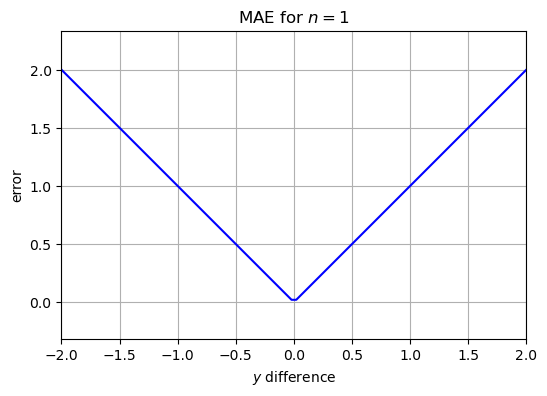

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))

y_diff = np.linspace(-2, 2, 100)
error = np.abs(y_diff)
ax.plot(y_diff, error, '-b')
ax.axis('equal')
ax.grid()
ax.set_xlim(-2, 2)
ax.set_xlabel('$y$ difference')
ax.set_ylabel('error')
ax.set_title('MAE for $n=1$')

plt.show()

In [ ]:
fig = go.Figure()
fig.layout.width = 800
fig.layout.height = 600

y1_diff, y2_diff = np.meshgrid(y_diff, y_diff)
error = 0.5 * (np.abs(y1_diff) + np.abs(y2_diff))
fig.add_trace(go.Surface(
    x=y1_diff, y=y2_diff, z=error,
    colorscale=[[0, 'rgb(0,0,255)'], [1, 'rgb(0,0,255)']],
    showscale=False
))

fig.update_scenes(
    xaxis_title_text='y<sub>1</sub> difference',  
    yaxis_title_text='y>sub>2</sub> difference',  
    zaxis_title_text='error'
)
fig.update_layout(scene_aspectmode='cube', title={'text': 'MAE for n = 2', 'x': 0.5, 'xanchor': 'center'})

fig.show()

Its value is proportional to the deviation of predictions from correct labels and does not overemphasize large deviations. A major drawback is its non-differentiability. Neither can we compute explicit solutions to corresponding minimization problems, nor can we use simple gradient based optimization algorithms.

Scikit-Learn provides [`mean_absolute_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error) in its `metrics` module.

### Huber Loss

Huber loss is a mixture of mean squared error and mean absolute error. It tries to combine the advantages of both. At small arguments Huber loss is quadratic (and thus differentiable). At larger arguments Huber loss is linear (and thus less sensitive to outliers). Huber loss is of the form
\begin{equation*}
\frac{1}{n}\,\sum_{l=1}^n h\bigl(f_{\mathrm{approx}}(x_l)-y_l\bigr)
\end{equation*}
with
\begin{equation*}
h(z)=\begin{cases}z^2,&\text{if }|z|\leq\varepsilon,\\2\,\varepsilon\,|z|-\varepsilon^2,&\text{else}.\end{cases}
\end{equation*}
The parameter $\varepsilon>0$ determines the value at which quadratic growth is replaced by linear growth. Statistical considerations suggest $\varepsilon=1.35$. But other choice may be more appropriate in non-standard situations. Huber loss typically includes scaling the data to make the choice of $\varepsilon$ independent from the data's range.

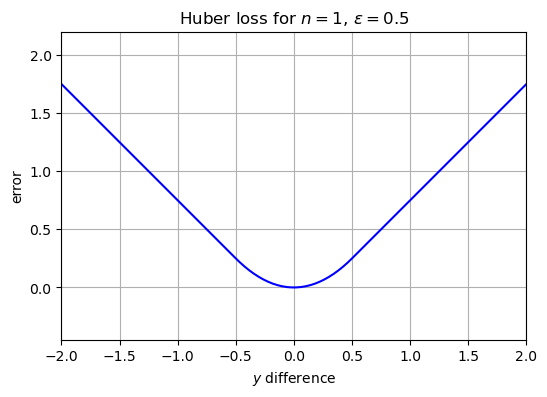

In [ ]:
eps = 0.5

fig, ax = plt.subplots(figsize=(6, 4))

y_diff = np.linspace(-2, 2, 100)
error = y_diff ** 2
mask = np.abs(y_diff) > eps
error[mask] = 2 * eps * np.abs(y_diff[mask]) - eps ** 2
ax.plot(y_diff, error, '-b')
ax.axis('equal')
ax.set_xlim(-2, 2)
ax.grid()
ax.set_xlabel('$y$ difference')
ax.set_ylabel('error')
ax.set_title(r'Huber loss for $n=1$, $\varepsilon=0.5$')

plt.show()

In [ ]:
fig = go.Figure()
fig.layout.width = 800
fig.layout.height = 600

y1_diff, y2_diff = np.meshgrid(y_diff, y_diff)
error1 = y1_diff ** 2
mask = np.abs(y1_diff) > eps
error1[mask] = 2 * eps * np.abs(y1_diff[mask]) - eps ** 2
error2 = y2_diff ** 2
mask = np.abs(y2_diff) > eps
error2[mask] = 2 * eps * np.abs(y2_diff[mask]) - eps ** 2
error = 0.5 * (error1 + error2)
fig.add_trace(go.Surface(
    x=y1_diff, y=y2_diff, z=error,
    colorscale=[[0, 'rgb(0,0,255)'], [1, 'rgb(0,0,255)']],
    showscale=False
))

fig.update_scenes(
    xaxis_title_text='y<sub>1</sub> difference',  
    yaxis_title_text='y<sub>2</sub> difference',  
    zaxis_title_text='error'
)
fig.update_layout(scene_aspectmode='cube', title={'text': 'Huber loss for n = 2, ε = 0.5', 'x': 0.5, 'xanchor': 'center'})

fig.show()

Scikit-Learn does not provide the Huber loss in its `metrics` module, but it implements some machine learning methods using that loss implicitly.

## Classification Outputs

The final output of classification methods should be class labels. But many algorithms do not yield a concrete label but for each class a probability value that the input belongs the that class. Alternatively algorithms may use a scoring scheme, where each class is assigned a score. High scores indicate high probability that the input belongs to that class.

In total we have three different output variants from classification algorithms: labels, probabilities, scores. Thus, we have to think about conversion methods between them and we will meet quality measures suitable for one variant but not for others. Thus, choice of quality measures also depends on the classification method's output 'format'.

Before we come to concrete quality measures we discuss conversion methods between the three output variants.

### From Probabilities to Labels

Although classification problems deal with discrete targets most classification algorithms yield values in the continuous range $[0,1]$. Given an input the algorithm may provide as many values from $[0,1]$ as there are classes. Each such value can be interpreted as the probability that the input belongs to the corresponding class. In some cases the values do not add up to 1, thus it might not be a probability in the mathematical sense. In addition, if we do not specify the underlying probabilistic framework, we should not speek about probabilities. Thus, a better alternative is *probability-like score*.

For binary (that is, 2-class) classification problems there is usually only one output $p\in[0,1]$. This can be seen as the probability for the input to belong to the one class. The probability for the other class then is $1-p$. To derive a concrete class from $p$ we may use a threshold value $t\in(0,1)$:
\begin{align*}
p\leq t&\quad\Rightarrow\quad\text{class A},\\
p>t&\quad\Rightarrow\quad\text{class B}.
\end{align*}
Next to the canonical choice $t=0.5$ other choice may be appropriate in some situations.

For multiclass problems the class with the highest probability-like score is chosen. If there are several classes with high probaility, then the algorithm wasn't able to make a clear decision. Knowledge about class probabilities can be used to improve the algorithm or to inform the user about a less trustworthy result.

### From Scores to Probabilities

If an algorithm outputs scores not lying in $[0,1]$ we may transform them to get probability-like scores. For bounded scores, say in $[a,b]$, the simple linear transform
\begin{equation*}
z\mapsto\frac{z-a}{b-a}
\end{equation*}
does a good job. But the unbounded case is not as simple as the bounded one.

If scores are arbitrary (unbounded) values in $\mathbb{R}$, the transform should be defined on the whole real axis, it should be monotonically increasing, and it should map negative numbers to $[0,\frac{1}{2})$ and positive numbers to $(\frac{1}{2},1]$. The *sigmoid function*
\begin{equation*}
z\mapsto\frac{1}{1+\mathrm{e}^{-z}},\qquad z\in\mathbb{R},
\end{equation*}
shows all those properties.

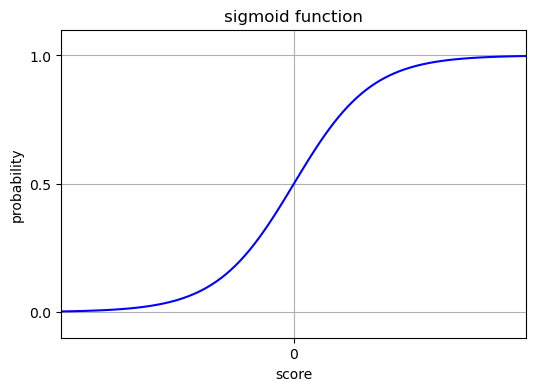

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))

z = np.linspace(-6, 6, 100)
p = 1 / (1 + np.exp(-z))
ax.plot(z, p, '-b')
ax.set_xlim(-6, 6)
ax.set_xticks([0])
ax.set_ylim(-0.1, 1.1)
ax.set_yticks([0, 0.5, 1])
ax.grid()
ax.set_xlabel('score')
ax.set_ylabel('probability')
ax.set_title('sigmoid function')

plt.show()

Note that 0 and 1 do not belong to the range of the sigmoid function, but
\begin{equation*}
\lim_{z\to-\infty}\frac{1}{1+\mathrm{e}^{-z}}=0\qquad\text{and}\qquad\lim_{z\to\infty}\frac{1}{1+\mathrm{e}^{-z}}=1.
\end{equation*}

In case of binary classification with classes A and B we typically only have one output $z\in\mathbb{R}$ with high values indicating that a sample belongs to class A and low values indicating that a sample belongs to class B. Predicted class probabilities can be defined as
\begin{align*}
\text{probability for class A}&:=\frac{1}{1+\mathrm{e}^{-z}}\\
\text{probability for class B}&:=1-\frac{1}{1+\mathrm{e}^{-z}}
=\frac{\mathrm{e}^{-z}}{1+\mathrm{e}^{-z}}=\frac{1}{1+\mathrm{e}^z}.
\end{align*}

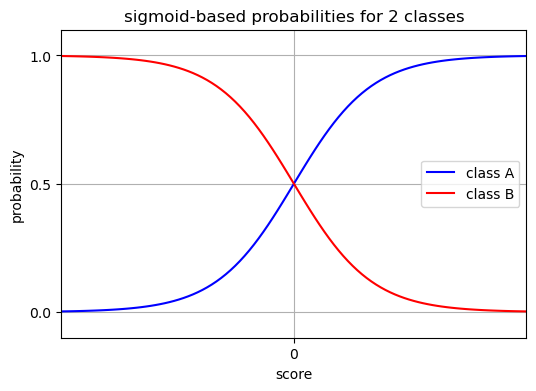

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))

z = np.linspace(-6, 6, 100)
p1 = 1 / (1 + np.exp(-z))
p2 = 1 / (1 + np.exp(z))
ax.plot(z, p1, '-b', label='class A')
ax.plot(z, p2, '-r', label='class B')
ax.set_xlim(-6, 6)
ax.set_xticks([0])
ax.set_ylim(-0.1, 1.1)
ax.set_yticks([0, 0.5, 1])
ax.grid()
ax.legend()
ax.set_xlabel('score')
ax.set_ylabel('probability')
ax.set_title('sigmoid-based probabilities for 2 classes')

plt.show()

For multiclass classification with classes $1,\ldots,C$ and class scores $z_1,\ldots,z_C$ we may use the *softmax function*:
\begin{align*}
\text{probability for class $i$}&:=\frac{\mathrm{e}^{z_i}}{\mathrm{e}^{z_1}+\cdots+\mathrm{e}^{z_C}},\qquad i=1,\ldots C.
\end{align*}
These values lie in $[0,1]$ and sum up to 1.

In [28]:
fig = go.Figure()
fig.layout.width = 800
fig.layout.height = 600

z1, z2 = np.meshgrid(z, z)
p1 = np.exp(z1) / (np.exp(z1) + np.exp(z2))
p2 = np.exp(z2) / (np.exp(z1) + np.exp(z2))
fig.add_trace(go.Surface(
    x=z1, y=z2, z=p1,
    colorscale=[[0, 'rgb(0,0,255)'], [1, 'rgb(0,0,255)']],
    showscale=False,
    showlegend=True,
    name='Class 1'
))
fig.add_trace(go.Surface(
    x=z1, y=z2, z=p2,
    colorscale=[[0, 'rgb(255,0,0)'], [1, 'rgb(255,0,0)']],
    showscale=False,
    showlegend=True,
    name='Class 2'
))

fig.update_scenes(
    xaxis_title_text='score z<sub>1</sub>',  
    yaxis_title_text='score z<sub>2</sub>',  
    zaxis_title_text='probability'
)
fig.update_layout(scene_aspectmode='cube', title={'text': 'softmax-based probabilities for two classes with per-class scores', 'x': 0.5, 'xanchor': 'center'})

fig.show()

```{note}
It's a nice little math exercise to prove that softmax-based probabilites for two classes with two scores solely depend on the difference of the two scores, not on their absolute values.

As by-product one sees that for two classes computing probabilities from two independent scores (via softmax) is the same as computing probabilities from one score (via sigmoid) if one identifies the one score with the difference of the two scores.
```

We'll meet sigmoid and softmax functions in slightly different contexts when discussing machine learning methods like artificial neural networks and logistic regression.

## Quality Measures for Classification

There are many different measures for prediction quality of classification algorithms. Here we mention only the most important ones. Given a data set each measure either compares predicted labels to correct labels or it's based on class probabilities. In all cases the outcome is a positive real number expressing some kind of prediction quality.

### Correct Classification Rate (Accuracy)

Correct classification rate (or accuracy) counts the number of correct predictions and normalizes the result to $[0,1]$, where 0 indicates no correct predictions and 1 indicates that all predictions are correct. Formula:
\begin{equation*}
\text{accuracy}:=\frac{\text{correct predictions}}{\text{number of samples}}.
\end{equation*}

Care has to be taken in interpretation, because accuracy above 0 does not mean that the classifier does anything useful. We have to compare the accuracy of the model under consideration to the accuracy of a purely random classifier. A purely random classifier assigns labels by chance equally distributed over all classes. Thus, accuracies close to or below
\begin{equation*}
\frac{1}{\text{number of classes}}
\end{equation*}
are very bad.

```{important}
Always think twice! If we have spent hours in training a classifier on cat and dog images and evaluation on independent data shows a correct classification rate of 55 per cent, is this a good result? No! Assiging labels 'cat' and 'dog' by chance we would get nearly the same result (50 per cent accuracy) with almost no computational effort.
```

There is another, more severe issue. Correct classification rate only yields reasonable results if the test set is balanced, that is, if the number of samples per class does not depend on the class.

**Example:** Consider three classes A, B, C and a test set with 100 samples;
\begin{equation*}
\text{5 in A,$\quad$ 10 in B,$\quad$ 85 in C.}
\end{equation*}
If a (very simple) classifier always chooses class C, then accuracy is 85 per cent, which sounds pretty good! If we have a test set with
\begin{equation*}
\text{50 in A,$\quad$ 40 in B,$\quad$ 10 in C,}
\end{equation*}
then accuracy drops to 10 per cent, although it's still the same classifier. With a balanced test set, say
\begin{equation*}
\text{33 in A,$\quad$ 33 in B,$\quad$ 34 in C,}
\end{equation*}
accuracy is 34 per cent, which is close to the accuracy of a purely random classifier. Thus we see that the classifier does not do anything useful.

Scikit-Learn provides [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) in its `metrics` module.

### Balanced accuracy

For imbalanced test sets correct classification rate does not yield sensible results. But imbalanced test sets are much more common than balanced ones. To obtain an accuracy-like quality measure for imbalanced test sets we measure the accuracy on each class and then take the mean over all classes. Here accuracy on a class is the number of correctly classified samples from a class devided by the class size. If we have $C$ classes, then
\begin{equation*}
\text{balanced accuracy}:=\frac{1}{C}\,\sum_{i=1}^C\frac{\text{number of samples correctly labeled as class $i$}}{\text{total number of samples in class $i$}}.
\end{equation*}

**Example:** Consider the three classes problem with a classifier always predicting class C again. If 5 samples belong to class A, 10 to B, 85 to C, then we have
\begin{equation*}
\text{5 in A,$\quad$ 10 in B,$\quad$ 85 in C}\qquad\Rightarrow\qquad
\text{bal. acc.}=\frac{1}{3}\,\left(\frac{0}{5}+\frac{0}{10}+\frac{85}{85}\right)=\frac{1}{3}.
\end{equation*}
\begin{equation*}
\text{50 in A,$\quad$ 40 in B,$\quad$ 10 in C}\qquad\Rightarrow\qquad
\text{bal. acc.}=\frac{1}{3}\,\left(\frac{0}{50}+\frac{0}{40}+\frac{10}{10}\right)=\frac{1}{3}.
\end{equation*}
\begin{equation*}
\text{33 in A,$\quad$ 33 in B,$\quad$ 34 in C}\qquad\Rightarrow\qquad
\text{bal. acc.}=\frac{1}{3}\,\left(\frac{0}{33}+\frac{0}{33}+\frac{34}{34}\right)=\frac{1}{3}.
\end{equation*}
The example shows that balanced accuracy does not depend on possibly imbalanced class sizes in the test set. In all cases we obtain results indicating that the classifier is not better than a purely random classifier. Note that with a purely random classifier for each test set we would have
\begin{equation*}
\text{bal. acc.}=\frac{1}{3}\,\left(\frac{1}{3}+\frac{1}{3}+\frac{1}{3}\right)=\frac{1}{3}.
\end{equation*}

Scikit-Learn provides [`balanced_accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html) in its `metrics` module.

### Confusion Matrix

Although confusion matrices are not a numeric quality measure they offer a good overview of classification results. For classification with classes $1,\ldots,C$ the confusion matrix is a $C\times C$ matrix showing in row $i$ and column $j$ the number of samples belonging to class $i$ and classified as $j$.

If all samples were classified correctly, then the confusion matrix is purely diagonal.

Scikit-Learn provides [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) in its `metrics` module.

### Log Loss

Log loss (or logistic regression loss or cross-entropy loss) is a loss, not a score. That is, best prediction quality is indicated by zero log loss and the higher the loss the lower the prediction quality (to get a score, use negative log loss). Log loss requires predicted class probabilities, not class labels.

Given a test set with $n$ samples we denote the true labels by $y_1,\ldots,y_n$ and the predicted probabilities that sample $l$ belongs to class $y_l$ (its true class) by $p_1,\ldots,p_n$. Then
\begin{equation*}
\text{log loss}:=-\frac{1}{n}\,\sum_{l=1}^n\log p_l=-\log\left(\left(\prod_{l=1}^n p_l\right)^{\frac{1}{n}}\right).
\end{equation*}
The product $\prod p_l$ is the predicted probability that each sample belongs to its true class. The $n$-th root ensures independence from test set size (like the factor $\frac{1}{n}$ for sums over all samples). The negative logarithm transforms the interval $[0,1]$ to $[0,\infty]$ by mapping $0$ to $\infty$ and $1$ to $0$. In other words, the negative logarithm transforms a probability (high is good) into a loss (low is good). Other functions for such tranform may be used, too, but negative logarithm is the most widely used one.

```{note}
Always try to explain formulas in few words without mathematical symbols. The log loss formula could be explained as follows: **Log loss expresses (up to scaling) how convinced the model is that each sample belongs to the class it really belongs to.**

Then consider edge cases: Log loss is zero if the model assignes probability 1 to the correct classes for all samples. Log loss tends to infinity if the model assignes only very small probabilities to the correct classes for all samples.
```

Often log loss is written as a more complex formula explicitly showing the dependence on the true labels $y_1,\ldots,y_n$. With classes $1,2,\ldots, C$ set
\begin{equation*}
y_{l,i}:=\begin{cases}1,&\text{if }y_l=i,\\0,&\text{else}\end{cases}
\qquad\text{for}\quad l=1,\ldots,n\quad\text{and}\quad i=1,\ldots,C
\end{equation*}
(one-hot encoding) and denote by $p_{l,i}$ the predicted probability that sample $l$ belongs to class $i$.
Then
\begin{equation*}
\text{log loss}=-\frac{1}{n}\,\sum_{l=1}^n\sum_{i=1}^C y_{l,i}\,\log p_{l,i},
\end{equation*}
where we set
\begin{equation*}
0\,\log 0:=0.
\end{equation*}

For binary classification with class labels 0 and 1 and predicted probabilities $p_{1,1},\ldots,p_{n,1}$ for samples to belong to class 1, log loss reduces to
\begin{equation*}
\text{binary log loss}=-\frac{1}{n}\,\sum_{l=1}^n\bigl(y_l\,\log p_{l,1}+(1-y_l)\,\log(1-p_{l,1})\bigr).
\end{equation*}

```{note}
Nice little math exercise: Consider binary classification with class labels 0 and 1. Show that if predicted probabilities $p_{1,1},\ldots,p_{n,1}$ for class 1 result from a sigmoid transform of scores $z_1,\ldots,z_n$, then
\begin{equation*}
\text{binary log loss}=\frac{1}{n}\,\sum_{l=1}^n\log\begin{cases}1+\mathrm{e}^{z_l},&\text{if }y_l=0,\\1+\mathrm{e}^{-z_l},&\text{if }y_l=1.\end{cases}
\end{equation*}
```

Scikit-Learn provides [`log_loss`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html) in its `metrics` module.

### Precision and Recall

Precision and recall are quality measures for binary classification problems. Almost always the two classes in a binary classification problem are not on a par. Instead they are based on answering the question whether a sample shows some prespecified property ('positive') or not ('negative'). Usage of precision and recall relies on this interpretation of binary classification.

Precision is the amount of correctly classified positives in the set of all samples classified as 'positive':
\begin{equation*}
\text{precision}:=\frac{\text{number of samples correctly classified 'positive'}}{\text{total number of samples classified 'positive'}}.
\end{equation*}

In constrast, recall (or true positive rate (TPR) or sensitivity) counts the number of correctly classified positives in the set of all positives:
\begin{equation*}
\text{recall}:=\frac{\text{number of samples correctly classified 'positive'}}{\text{total number of positive samples}}.
\end{equation*}

Both, precision and recall yield numbers in $[0,1]$; the higher the better the prediction quality. High precision tells us that the classifier does not label to many negatives as 'positive'. High recall tells us that the classifier is able to detect sufficiently many positives.

**Example:** If a doctor (the classifier) shall diagnose some disease, high precision means that the doctor has only very few wrong diagnoses (but may declare some ill clients as healthy). High recall means that the doctor identifies almost all ill persons (but may declare some healthy persons as ill).

Whether precision or recall are sensible measures for prediction qualitiy heavily depends on the context of the classification problem.

**Example:** We want to detect some rare event, say some rare disease, and we have 100 samples, 1 positive, 99 negative. If our classifier classifies all samples as positive, then precision is 0.01 and recall is 1. An always-negative classifier would have undefined precision and recall 0. If our classifier labels by chance (50 samples labeled 'positive', 50 'negative'), then precision and recall are 0.02 and 1 if the positive sample is labeled correctly. If it is labled as 'negative', then precision and recall both are 0.

Scikit-Learn provides [`precision_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) and [`recall_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) in its `metrics` module.


### F1-score

F1-score (or F-score) combines precision and recall by taking their [harmonic mean](https://en.wikipedia.org/wiki/Harmonic_mean):
\begin{equation*}
\text{F1-score}=\frac{2}{\frac{1}{\text{precision}}+\frac{1}{\text{recall}}}=\frac{2\cdot\text{precision}\cdot\text{recall}}{\text{precision}+\text{recall}}.
\end{equation*}

The F1-score is always in $[0,1]$. If one of both, precision or recall, is close to 0, then the F1-score is close to 0. If both are close to 1, then the F1-score is close to 1. Thus, high F1-score guarantees good prediction quality (most 'positive' labels are correct and only few positive samples are missed).

Scikit-Learn provides [`f1_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) in its `metrics` module.

### Area Under Receiver Operator Characteristic Curve (AUC)

AUC (area under curve) measures the area under a curve called reveiver operator characteristic (ROI) curve. This quality measure works for classification algorithms yielding a probability-like score with high values indicating positive samples and low values indicating negative samples. AUC does not depend on the threshold for converting scores to class labels. Instead, it expresses the **probability that a randomly drawn positive sample gets a higher score than a randomly drawn negative sample**.

Related Scikit-Learn methods are
* [`roc_auc_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)
* [`roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)
* [`RocCurveDisplay.from_predictions`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_predictions)

#### Definition of AUC

Given true labels $y_1,\ldots,y_n$ ('positive' or 'negative') and corresponding scores $p_1,\ldots,p_n\in[0,1]$ consider for each threshold $t\in(0,1)$ the *false positive rate*
\begin{equation*}
\mathrm{FPR}(t):=\frac{\text{number of negative samples with $p_l>t$}}{\text{total number of negative samples}}
\end{equation*}
and the *true positive rate* (precision)
\begin{equation*}
\mathrm{TPR}(t):=\frac{\text{number of positive samples with $p_l>t$}}{\text{total number of positive samples}}.
\end{equation*}

Then the ROC 'curve' is the (finite) set of points
\begin{equation*}
\{(FPR(t),TPR(t)):\,t\in(0,1)\}.
\end{equation*}
Often these points are connected by straight lines and the resulting curve is denoted as ROC curve. AUC is the area under that curve.

**Example:** Assume we have $n=7$ samples and a trained binary classification model yields probability-like scores as follows:
| true label | predicted probability |
|-----|-----|
| negative | 0.1 |
| negative | 0.5 |
| negative | 0.3 |
| negative | 0.85 |
| positive | 0.6 |
| positive | 0.25 |
| positive | 0.95 |

Then FPR and TPR look as follows:

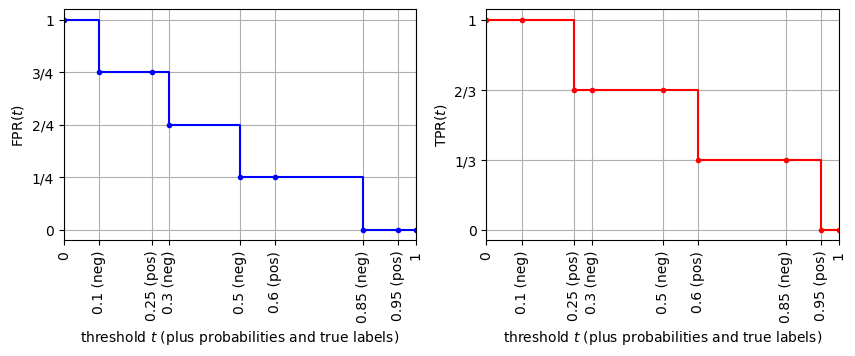

In [66]:
t = np.array([0, 0.1, 0.25, 0.3, 0.5, 0.6, 0.85, 0.95, 1])
fpr = np.array([4, 3, 3, 2, 1, 1, 0, 0, 0]) / 4
tpr = np.array([3, 3, 2, 2, 2, 1, 1, 0, 0]) / 3
labels = ['neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos']
ticklabels = [str(t[i+1]) + ' (' + labels[i] + ')' for i in range(len(labels))]
ticklabels = ['0'] + ticklabels + ['1']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
ax1.step(t, fpr, 'o-b', where='post', markersize=3, label='false positive rate')
ax2.step(t, tpr, 'o-r', where='post', markersize=3, label='true positive rate')
ax1.set_xlabel('threshold $t$ (plus probabilities and true labels)')
ax2.set_xlabel('threshold $t$ (plus probabilities and true labels)')
ax1.set_ylabel('$\mathrm{FPR}(t)$')
ax2.set_ylabel('$\mathrm{TPR}(t)$')
ax1.set_xlim(0, 1)
ax2.set_xlim(0, 1)
ax1.set_xticks(t)
ax1.set_xticklabels(ticklabels, rotation=90)
ax1.set_yticks(np.arange(0, 5) / 4)
ax1.set_yticklabels([0, '1/4', '2/4', '3/4', 1])
ax1.grid()
ax2.set_xticks(t)
ax2.set_xticklabels(ticklabels, rotation=90)
ax2.set_yticks(np.arange(0, 4) / 3)
ax2.set_yticklabels([0, '1/3', '2/3', 1])
ax2.grid()
plt.show()

FPR drops whenever $t$ hits the predicted probability of a negative sample. Thus, we may identify steps in FPR (or areas between horizontal grid lines) with the negative samples. Analogously, we may identify steps in TPR with the positive samples.

The ROC curve is:

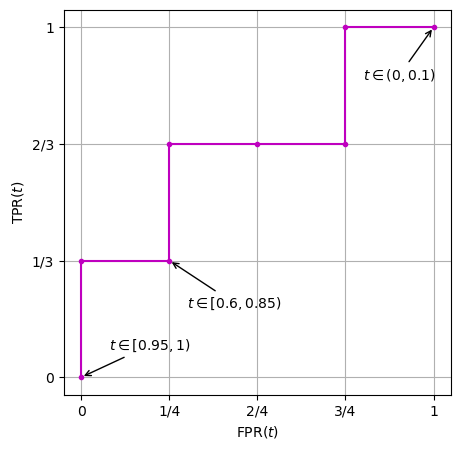

In [78]:
t = np.array([0, 0.1, 0.25, 0.3, 0.5, 0.6, 0.85, 0.95, 1])
fpr = np.array([4, 3, 3, 2, 1, 1, 0, 0, 0]) / 4
tpr = np.array([3, 3, 2, 2, 2, 1, 1, 0, 0]) / 3

fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(fpr[:-1], tpr[:-1], 'o-m', markersize=3)
ax.set_xlabel('$\mathrm{FPR}(t)$')
ax.set_ylabel('$\mathrm{TPR}(t)$')
ax.set_xticks(np.arange(0, 5) / 4)
ax.set_xticklabels([0, '1/4', '2/4', '3/4', 1])
ax.set_yticks(np.arange(0, 4) / 3)
ax.set_yticklabels([0, '1/3', '2/3', 1])
ax.grid()

ax.annotate('$t\in(0,0.1)$', (1, 1), xytext=(0.8, 0.85), arrowprops={'arrowstyle': '->'})
ax.annotate('$t\in[0.6,0.85)$', (1/4, 1/3), xytext=(0.3, 0.2), arrowprops={'arrowstyle': '->'})
ax.annotate('$t\in[0.95,1)$', (0, 0), xytext=(0.08, 0.08), arrowprops={'arrowstyle': '->'})

plt.show()

Now AUC is
\begin{equation*}
\mathrm{AUC}=8\cdot\frac{1}{3}\cdot\frac{1}{4}=\frac{2}{3}.
\end{equation*}

#### Properties of the ROC curve

From the definition of the ROC curve we easily deduce following properties:
* If there are no samples with equal scores, then the ROC curve is composed of horizontal and vertical line segments.
* It always connects $(0,0)$ with $(1,1)$ if scores are strictly between 0 and 1. If some scores are 0 or 1, then the endpoints are at least close to $(0,0)$ and $(1,1)$.
* The ROC curve is monotonically increasing.

#### Properties of AUC

From the definition of AUC we easily deduce following properties:
* AUC is always in $[0,1]$.
* AUC is 1 if and only if the classification algorithm labels all samples correctly.
* AUC is 0 if and only if the classification algorithm labels all positive samples 'negative' and all negative samples 'positive'.
* For a classification algorithm drawing scores at random equally distributed in $[0,1]$ AUC is approximately 0.5 (the ROC curve is close to the diagonal).

#### Proof of AUC Interpretation

We stated above that AUC is the probability that a randomly chosen positive sample has higher score than a randomly chosen negative sample. To see this we look at the grid implicitly defined by the ROC curve. This idea is taken from [The Probabilistic Interpretation of AUC](http://madrury.github.io/jekyll/update/statistics/2017/06/21/auc-proof.html), where missleadingly grid points are counted instead of boxes (areas between grid lines).

To avoid discussion of certain special cases we assume that all scores $p_1,\ldots,p_n$ are different and no score is 0 or 1. To simplify notation further we assume that samples are sorted by predicted probability, that is,
\begin{equation*}
p_1<p_2<\cdots<p_n.
\end{equation*}
Thus, samples 2, 5, 7 are positive and samples 1, 3, 4, 6 are negative in the example above.

Given a positive sample and a negative sample we identify the positive sample with corresponding step in TPR and the negative sample with corresponding step in FPR. Thus, each positive-negative may identified with a box in the grid:

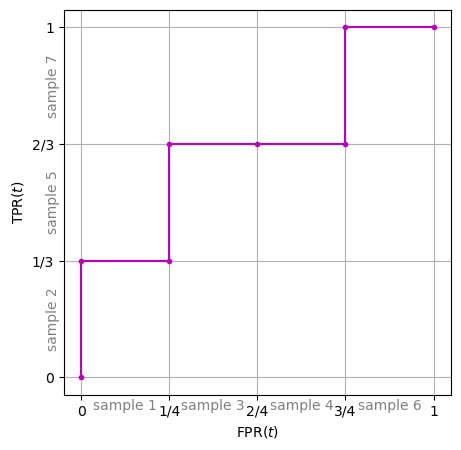

In [96]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(fpr[:-1], tpr[:-1], 'o-m', markersize=3)
ax.set_xlabel('$\mathrm{FPR}(t)$')
ax.set_ylabel('$\mathrm{TPR}(t)$')
ax.set_xticks(np.arange(0, 5) / 4)
ax.set_xticklabels([0, '1/4', '2/4', '3/4', 1])
ax.set_yticks(np.arange(0, 4) / 3)
ax.set_yticklabels([0, '1/3', '2/3', 1])
ax.grid()

ax.text(-0.08, 1/6, 'sample 2', ha='center', va='center', rotation=90, color='#808080')
ax.text(-0.08, 3/6, 'sample 5', ha='center', va='center', rotation=90, color='#808080')
ax.text(-0.08, 5/6, 'sample 7', ha='center', va='center', rotation=90, color='#808080')

ax.text(1/8, -0.08, 'sample 1', ha='center', va='center', color='#808080')
ax.text(3/8, -0.08, 'sample 3', ha='center', va='center', color='#808080')
ax.text(5/8, -0.08, 'sample 4', ha='center', va='center', color='#808080')
ax.text(7/8, -0.08, 'sample 6', ha='center', va='center', color='#808080')

plt.show()

For some fixed positive-negative pair we want to show that the probability-like score of the positive sample is higher than the score of the negative sample if the box is below the curve and vice versa if the box is above the curve.

Assume the box is below the curve. Then we may go to the left and upwards until we are at a box which has two sides on the ROC curve. While going to the left FPR decreases, that is, score of corresponding negative samples increases. Going upwards TPR increases, that is, score of corresponding positive samples decreases. Thus, it remains to show that for a box with left and upper side on the curve corresponding positive sample has higher score than corresponding negative sample. But this can be seen from looking at a range of thresholds $t$ covering scores of both samples. Increasing the threshold FPR drops before TPR drops (else lower and right side of the box would be on the curve). Thus, score of the negative sample has to be smaller than for the positive sample.

For boxes above the curve we may use analog reasoning to see that score of corresponding negative sample is above corresponding positive sample. The probability that a randomly chosen positive sample is scored higher than a randomly chosen negative sample thus is the number of boxes below the curve divided by the total number of boxes or, equivalently (because all boxes have same area), the area under the curve divided by the total area, which is 1.

#### Choosing a Threshold

AUC does not depend on the threshold used for converting scores to labels. Thus, it cannot be used to find a good threshold but for comparing different classification methods. Finding a good threshold heavily depends on the underlying problem. We have to decide what is more important: high TPR or low FPR.

There exist several heuristic methods to derive a threshold form the ROC curve (not from AUC). One idea is to choose a threshhold where the ROC curve has high curvature or where the graph's slope is close to 1 (region A in figure below). Then the loss/gain in TPR is nearly the same as the loss/gain in FPR when modifying the threshold slightly. If, in contrast, we would choose a threshold where the curve is very steep (region B), then lowering the threshold would significantly increase TPR without increasing FPR too much. If the curve is very flat (region C), then larger thresholds would yield much smaller FPR while preserving TPR.

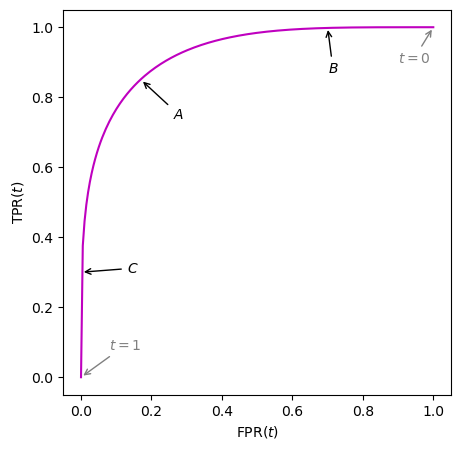

In [137]:
fig, ax = plt.subplots(figsize=(5, 5))

x = np.linspace(0, 1, 200)
y = (1 - (x - 1) ** 4) ** 0.25

ax.plot(x, y, '-m')
ax.set_xlabel('$\mathrm{FPR}(t)$')
ax.set_ylabel('$\mathrm{TPR}(t)$')

ax.annotate('$t=0$', (1, 1), xytext=(0.9, 0.9), arrowprops={'arrowstyle': '->', 'color': '#808080'}, color='#808080')
ax.annotate('$t=1$', (0, 0), xytext=(0.08, 0.08), arrowprops={'arrowstyle': '->', 'color': '#808080'}, color='#808080')
ax.annotate('$A$', (0.17, 0.85), xytext=(0.26, 0.74), arrowprops={'arrowstyle': '->'})
ax.annotate('$B$', (0.7, 1), xytext=(0.7, 0.87), arrowprops={'arrowstyle': '->'})
ax.annotate('$C$', (0, 0.3), xytext=(0.13, 0.3), arrowprops={'arrowstyle': '->'})

plt.show()

Another idea for choosing a threshold from the ROC curve is to choose the point (better: the corresponding theshold) closest to $(0, 1)$ (region A in figure). The point $(0, 1)$ corresponds to perfect classification (all positive samples labeled 'positive', no negative samples labeled 'positive'). Thus, getting as close as possible to this point is quite reasonable.

### Binary Metrics for Multiclass Classification

Quality measures for binary classification (precision, recall, F1-score, AUC)  can be extended to multiclass classification. For each class we look at the canonical binary problem (sample belongs to class or not) and calculate corresponing prediction quality for each such binary problem. The results then are averaged somehow.

Simplest way is to take the mean of all binary quality measures. If classes are very different in size, some weighting might be appropriate to lower influcence of performance on very small classes. This approach is known as *(weighted) macro averaging*. To make this precise let $n_1,\ldots,n_C$ be the sizes of the the $C$ classes and denote by $Q_1,\ldots,Q_C$ the binary metrics computed for corresponding C binary classification problems. Then
\begin{equation*}
\text{weighted macro average}=\frac{n_1}{n}\,Q_1+\cdots+\frac{n_C}{n}\,Q_C.
\end{equation*}

An alternative is *micro averaging*, which implements averaging over classes into the concrete structure of a binary metric. For precision, recall and F1-score micro averaging simply yields (unbalanced) accuracy. For AUC it's not clear how to define micro averaging. Thus, for us it doesn't add any value.